# Imports

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Get the data

In [167]:
df = pd.read_csv("Prostate_Cancer Data- CSV.csv",index_col=0)

In [168]:
df.head(5)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,B,9,13,133,1326,0.143,0.079,0.181,0.057
3,M,21,27,130,1203,0.125,0.160,0.207,0.060
4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,M,9,19,135,1297,0.141,0.133,0.181,0.059


The data has a total of 10 variables out of which 8 are numerical and one classifier variable that is diagnosis_result and one index variable the is id. The value of the classifier variable will depend upon the 8 numerical values so, the machine learning algorithm I will be using here is K Nearest Neighbors(KNN).

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [223]:
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.8+ KB


# Check for null values

In [169]:
df.isnull().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

Our dataframe doesn't have any null values so we can proceed further. If there are any null values we can handle them by either replacing them by mean of all values or by dropping them if the data is really big and dropping the values won't affect the result much.

# relationship Plot

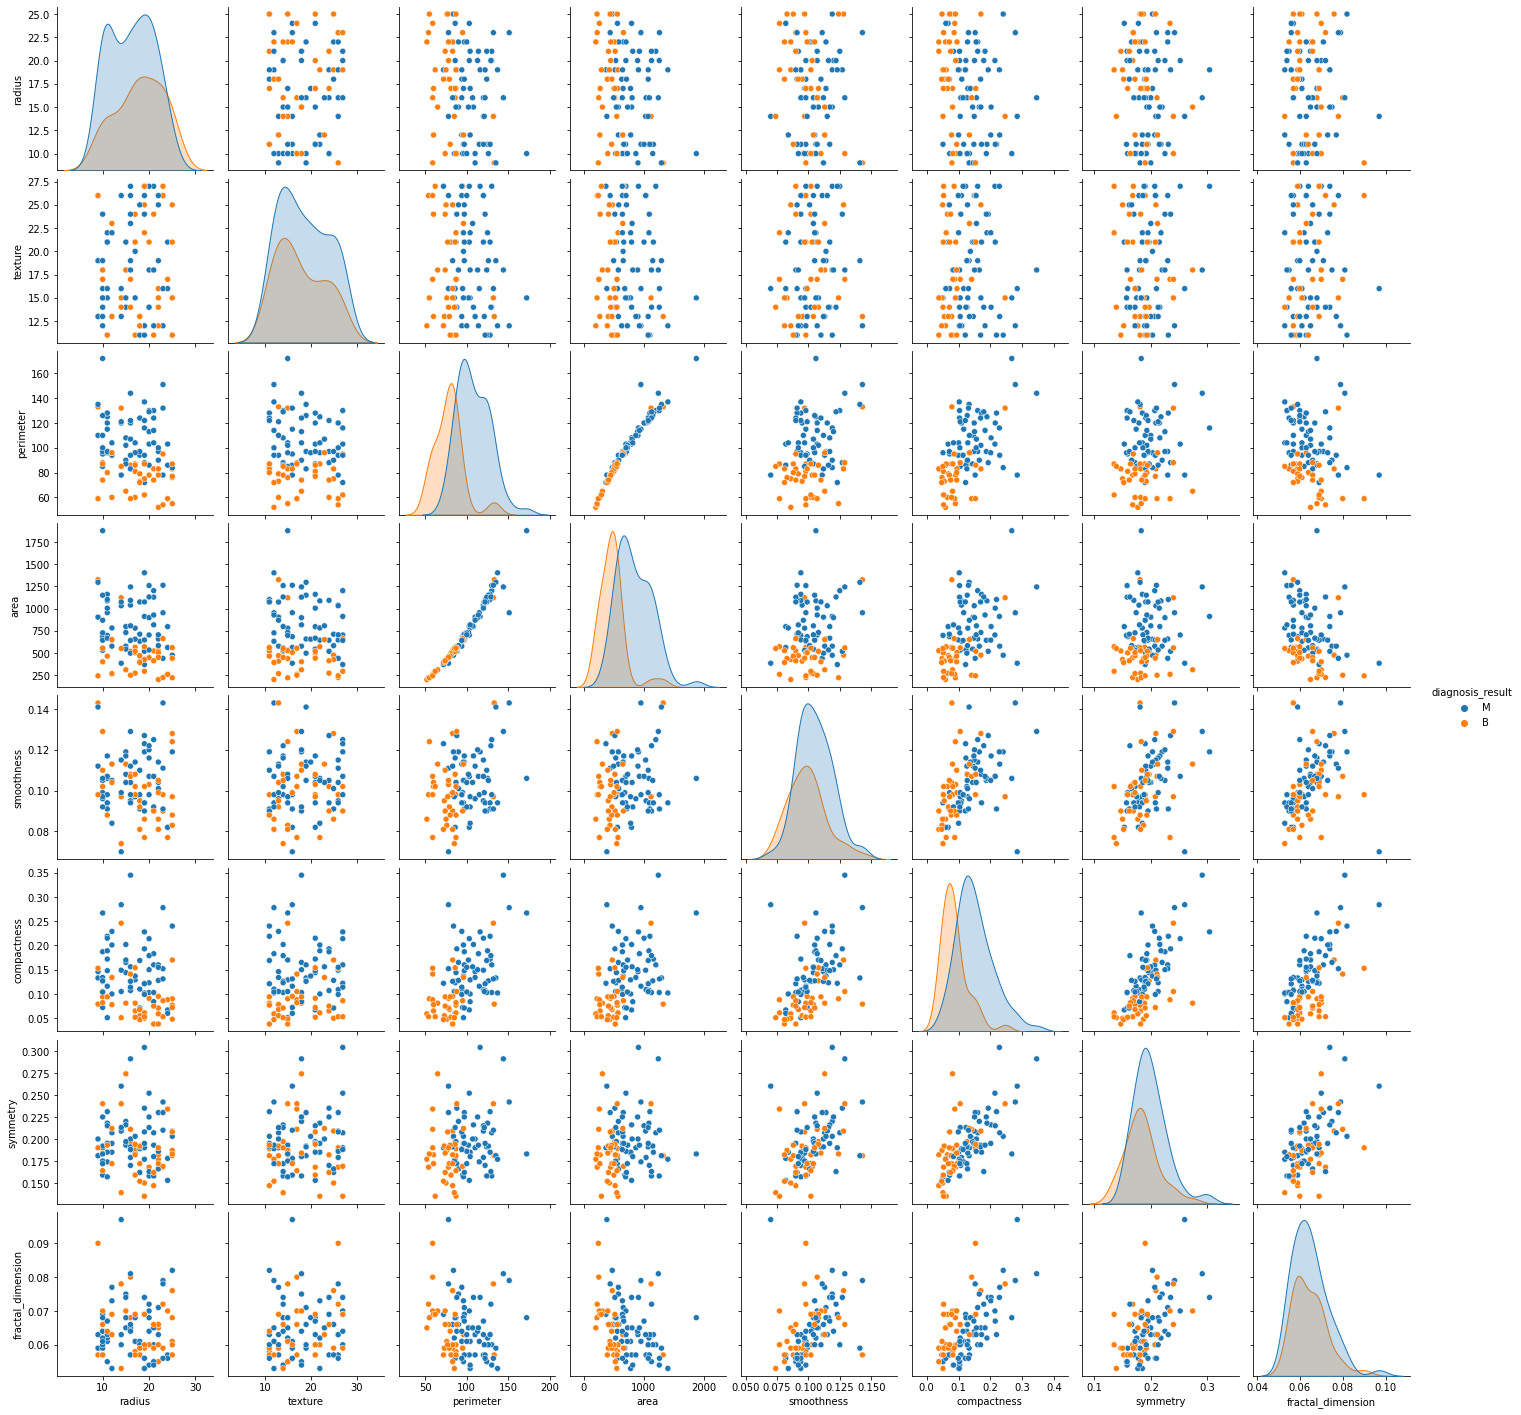

In [170]:
sns.pairplot(df, hue="diagnosis_result")

# Standardize the variables

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
scaler = StandardScaler()

In [173]:
scaler.fit(df.drop('diagnosis_result',axis=1))

StandardScaler()

In [174]:
scaled_features = scaler.transform(df.drop('diagnosis_result',axis=1))

In [175]:
df_feat = pd.DataFrame(scaled_features,columns=df.drop('diagnosis_result',axis=1).columns)
df_feat.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


# Train Test Split

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['diagnosis_result'],
                                                    test_size=0.35)

# Apply KNN

Remember that we are trying to come up with a model to predict whether someone will be a patient or not. We'll start with k=1.

In [211]:
from sklearn.neighbors import KNeighborsClassifier

In [212]:
knn = KNeighborsClassifier(n_neighbors=1)

In [213]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [214]:
pred = knn.predict(X_test)

# Prediction and Evaluevation

In [215]:
from sklearn.metrics import classification_report,confusion_matrix

In [216]:
print(confusion_matrix(y_test,pred))

[[ 6  7]
 [ 6 16]]


In [217]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           B       0.50      0.46      0.48        13
           M       0.70      0.73      0.71        22

    accuracy                           0.63        35
   macro avg       0.60      0.59      0.60        35
weighted avg       0.62      0.63      0.63        35



# Choosing a K value

In [218]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

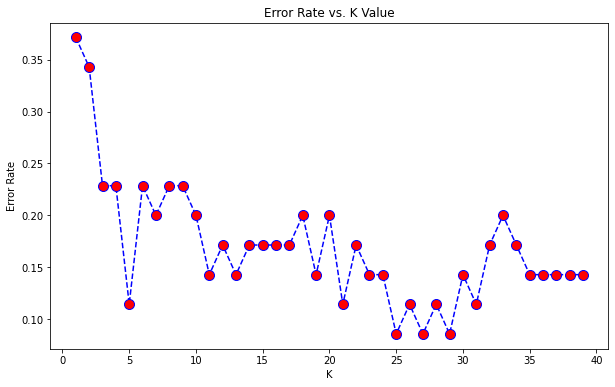

In [219]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

here we can see the the error is minimum at k = 25

# Comparision

# With k = 1

In [220]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 6  7]
 [ 6 16]]


              precision    recall  f1-score   support

           B       0.50      0.46      0.48        13
           M       0.70      0.73      0.71        22

    accuracy                           0.63        35
   macro avg       0.60      0.59      0.60        35
weighted avg       0.62      0.63      0.63        35



In [221]:
# With k = 25

In [222]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[11  2]
 [ 1 21]]


              precision    recall  f1-score   support

           B       0.92      0.85      0.88        13
           M       0.91      0.95      0.93        22

    accuracy                           0.91        35
   macro avg       0.91      0.90      0.91        35
weighted avg       0.91      0.91      0.91        35



We were able to squeeze some more performance out of our model by tuning to a better K value!